# SPARQL on Proteins
---

(2017-03-15 uuh)

There is a public endpoint at [sparql.uniprot.org](http:://sparql.uniprot.org/sparql)

We need to tell our sparql services where to connect and that results should be pretty-printed:

In [1]:
%endpoint http://sparql.uniprot.org/sparql

Endpoint set to: http://sparql.uniprot.org/sparql

It uses resources from a wide variety of contexts. To make them more readable we might want to use one of these prefixes later:
```sparql
    PREFIX keywords:<http://purl.uniprot.org/keywords/> 
    PREFIX uniprotkb:<http://purl.uniprot.org/uniprot/> 
    PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 
    PREFIX disease:<http://purl.uniprot.org/diseases/>
    PREFIX ec:<http://purl.uniprot.org/enzyme/> 
    PREFIX rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#> 
    PREFIX skos:<http://www.w3.org/2004/02/skos/core#> 
    PREFIX owl:<http://www.w3.org/2002/07/owl#> 
    PREFIX bibo:<http://purl.org/ontology/bibo/> 
    PREFIX dc:<http://purl.org/dc/terms/> 
    PREFIX xsd:<http://www.w3.org/2001/XMLSchema#> 
    PREFIX faldo:<http://biohackathon.org/resource/faldo#> 
    PREFIX up:<http://purl.uniprot.org/core/> 
```

Unfortunately `PREFIX` is part of the query and needs to be set as part of it.

Common wisdom is that it's the most comprehensive database on proteins.
How many entries does it have?

In [2]:
%endpoint http://sparql.uniprot.org/sparql
%display table
PREFIX up:<http://purl.uniprot.org/core/> 
SELECT ?numProteinsInDB COUNT(?protein) AS ?value
WHERE { 
    ?protein a up:Protein
}  

Endpoint set to: http://sparql.uniprot.org/sparql
Display: table

numProteinsInDB,value
,146378351


Select all UniProt entries, and their recommended protein name, that have a preferred gene name that contains the text 'DNA': 

In [3]:
%display  table
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX skos:<http://www.w3.org/2004/02/skos/core#> 
SELECT ?protein ?name
WHERE {
    ?protein a up:Protein .
    ?protein up:recommendedName ?recommended .
    ?recommended up:fullName ?name .
    ?protein up:encodedBy ?gene .
    ?gene skos:prefLabel ?text .
    FILTER CONTAINS(?text, 'DNA')
} LIMIT 10

Display: table

protein,name
http://purl.uniprot.org/uniprot/A0A0K8V3S1,DNA ligase
http://purl.uniprot.org/uniprot/A0A0K8W924,DNA ligase
http://purl.uniprot.org/uniprot/M5BLQ1,DNA ligase
http://purl.uniprot.org/uniprot/A0A0A1WGM5,DNA ligase
http://purl.uniprot.org/uniprot/A0A0C9QYY0,DNA polymerase
http://purl.uniprot.org/uniprot/A0A0C9Q128,DNA polymerase
http://purl.uniprot.org/uniprot/A0A0C9R474,DNA polymerase
http://purl.uniprot.org/uniprot/A0A0C9QV42,DNA polymerase
http://purl.uniprot.org/uniprot/Q8I944,DNA polymerase
http://purl.uniprot.org/uniprot/Q8I945,DNA polymerase


Select the preferred gene name and disease annotation of all human UniProt entries that are known to be involved in a disease.

First we'll need to find the taxon for Human.

In [4]:
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 
SELECT *
WHERE {
    ?taxon a up:Taxon.
    ?taxon up:scientificName "Homo sapiens"
}

taxon
http://purl.uniprot.org/taxonomy/9606


Now it's straight forward. To start, let's sample some entries:

In [16]:
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#> 
PREFIX skos:<http://www.w3.org/2004/02/skos/core#> 
SELECT SAMPLE(?geneName) AS ?geneName ?gene ?diseaseName  ?explanation
WHERE {
    ?protein a up:Protein . 
    ?protein up:organism taxon:9606 .
    ?protein up:encodedBy ?gene . 
    ?gene skos:prefLabel ?geneName .
    ?protein up:annotation ?annotation .
    ?annotation a up:Disease_Annotation .
    ?annotation up:disease ?disease .
    ?disease skos:prefLabel ?diseaseName .
    ?annotation rdfs:comment ?explanation .                
} LIMIT 42

geneName,gene,diseaseName,explanation
ENPP1,http://purl.uniprot.org/uniprot/P22413#gene-MD532FD539FC250D420BB8E68A66529887A,"Diabetes mellitus, non-insulin-dependent",Disease susceptibility is associated with variations affecting the gene represented in this entry.
CCDC174,http://purl.uniprot.org/uniprot/Q6PII3#gene-MD5BE9669C722C6B8D57ED8422BDE31ED7E,"Hypotonia, infantile, with psychomotor retardation",The disease is caused by mutations affecting the gene represented in this entry.
MYH3,http://purl.uniprot.org/uniprot/P11055#gene-MD536D891BF2350D7B56ABE3D2EE4496F93,"Arthrogryposis, distal, 2B",The disease is caused by mutations affecting the gene represented in this entry.
CDSN,http://purl.uniprot.org/uniprot/Q15517#gene-MD57272D0FA269C5C89D4F0A48C3C8DB9BE,Peeling skin syndrome 1,"The disease is caused by mutations affecting the gene represented in this entry. CDNS mutations are responsible for generalized, inflammatory peeling skin syndrome type B (PubMed:20691404)."
TTC7A,http://purl.uniprot.org/uniprot/Q9ULT0#gene-MD592C983CF010E2CB6527F40D49FC4D221,Gastrointestinal defects and immunodeficiency syndrome,"The disease is caused by mutations affecting the gene represented in this entry. Phenotypic variations have been observed: the mildest case show intestinal aberrations consisting of bloody diarrhea, apoptotic enterocolitis, and acute graft-versus-host disease- (GVHD)-like symptoms, but no atresias (PubMed:25546680). Other patients show multiple intestinal atresias, some being associated with immunodeficiency syndrome, while other do not show immunodeficiency defects (PubMed:23423984)."
ARX,http://purl.uniprot.org/uniprot/Q96QS3#gene-MD5BDED35B1E7318CFCBC569E4FD2446C64,"Agenesis of the corpus callosum, with abnormal genitalia",The disease is caused by mutations affecting the gene represented in this entry.
NR3C2,http://purl.uniprot.org/uniprot/P08235#gene-MD586BA6DD4DC5994C0FA58C79FC216494F,Early-onset hypertension with severe exacerbation in pregnancy,The disease is caused by mutations affecting the gene represented in this entry.
FOXE3,http://purl.uniprot.org/uniprot/Q13461#gene-MD5746B10654F771F4FC1181A6AC62A837A,"Aphakia, congenital primary",The disease is caused by mutations affecting the gene represented in this entry.
ATP6V0A4,http://purl.uniprot.org/uniprot/Q9HBG4#gene-MD5DA364C75DF80F7B09EA43B1E39609080,"Renal tubular acidosis, distal, autosomal recessive",The disease is caused by mutations affecting the gene represented in this entry.
SLC35A1,http://purl.uniprot.org/uniprot/P78382#gene-MD5F7676BD5CE23EDFA44B6AA7D9DC8DCA3,Congenital disorder of glycosylation 2F,The disease is caused by mutations affecting the gene represented in this entry.


Now, if graphviz is installed we can also draw diagrams:

Return format: N3
Display: png

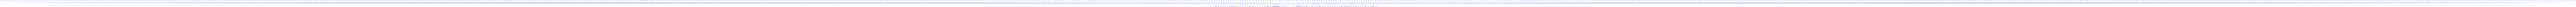

In [7]:
%format n3
%display diagram png
PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 
DESCRIBE taxon:9606
FROM <http://sparql.uniprot.org/taxonomy>
LIMIT 2

Return format: N3
Display: png

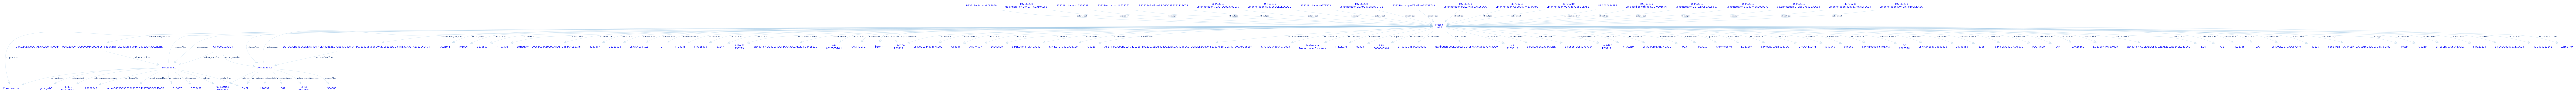

In [8]:
%format N3
%display diagram png
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#> 
DESCRIBE *
WHERE { ?protein a up:Protein .
      ?protein rdfs:seeAlso ?db .
      } LIMIT 2

In [8]:
%endpoint http://data.admin.ch/query/

Endpoint set to: http://data.admin.ch/query/

In [15]:
%format json
%display table
SELECT *
WHERE {
  ?sub ?pred ?obj .
} 
LIMIT 10

Return format: JSON
Display: table

sub,pred,obj
http://data.admin.ch/bfs/municipality/12895,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://data.admin.ch/vocab/Municipality
http://data.admin.ch/bfs/municipality/10575,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://data.admin.ch/vocab/Municipality
http://data.admin.ch/bfs/municipality/14114,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://data.admin.ch/vocab/Municipality
http://data.admin.ch/vocab/districtAdmissionDate,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://data.admin.ch/bfs/municipality/11114,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://data.admin.ch/vocab/Municipality
http://data.admin.ch/vocab/municipalityAdmissionMode,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://data.admin.ch/vocab/municipalityAdmissionDate,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://data.admin.ch/bfs/municipality/11035,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://data.admin.ch/vocab/Municipality
http://data.admin.ch/vocab/municipalityId,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://data.admin.ch/vocab/municipalityEntryMode,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Property


That looks interesting, but we have no idea what is hiding behind these. Is there much data?

In [23]:
SELECT
    COUNT(DISTINCT ?sub) as ?subjectCount
    COUNT(DISTINCT ?pred) as ?predCount
WHERE { 
    ?sub ?pred ?obj
} 

subjectCount,predCount
2001517,273


Ok, few predicates. Let's look at some

In [26]:
SELECT *
WHERE { 
    ?sub ?pred ?obj
} LIMIT 10

sub,pred,obj
http://data.admin.ch/bfs/municipality/12895,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://data.admin.ch/vocab/Municipality
http://data.admin.ch/bfs/municipality/10575,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://data.admin.ch/vocab/Municipality
http://data.admin.ch/bfs/municipality/14114,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://data.admin.ch/vocab/Municipality
http://data.admin.ch/vocab/districtAdmissionDate,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://data.admin.ch/bfs/municipality/11114,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://data.admin.ch/vocab/Municipality
http://data.admin.ch/vocab/municipalityAdmissionMode,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://data.admin.ch/vocab/municipalityAdmissionDate,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://data.admin.ch/bfs/municipality/11035,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://data.admin.ch/vocab/Municipality
http://data.admin.ch/vocab/municipalityId,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://data.admin.ch/vocab/municipalityEntryMode,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Property


In [30]:
%format N3
PREFIX dac:<http://data.admin.ch/vocab/>
DESCRIBE *
WHERE {
    ?sub a dac:Municipality
} LIMIT 5

Return format: N3

subject,predicate,object
http://data.admin.ch/bfs/municipality/13682,http://data.admin.ch/vocab/municipalityAbolitionMode,24
http://data.admin.ch/bfs/municipality/12907,http://data.admin.ch/vocab/municipalityLongName,Richterswil
http://data.admin.ch/bfs/municipality/12907,http://dbpedia.org/ontology/abstract,Samstagern ist ein Dorf in der Gemeinde Richterswil in der Schweiz.
http://data.admin.ch/bfs/municipality/12895,http://dbpedia.org/ontology/abstract,Riehen ist neben der Stadt Basel und Bettingen eine von drei Gemeinden innerhalb des Kantons Basel-Stadt in der Schweiz. Mit über 20'000 Einwohnern ist es die zweitgrösste Gemeinde der Nordwestschweiz.
http://data.admin.ch/bfs/municipality/10575,http://data.admin.ch/vocab/district,http://data.admin.ch/bfs/district/10053
http://data.admin.ch/bfs/municipality/12453,http://data.admin.ch/vocab/cantonAbbreviation,AG
http://data.admin.ch/bfs/municipality/14114,http://data.admin.ch/vocab/municipalityShortName,Rickenbach (TG)
http://data.admin.ch/bfs/municipality/10575,http://dbpedia.org/property/neighboringMunicipalities,http://dbpedia.org/resource/Affoltern_am_Albis
http://data.admin.ch/bfs/municipality/10575,http://dbpedia.org/property/neighboringMunicipalities,http://dbpedia.org/resource/Langnau_am_Albis
http://data.admin.ch/bfs/municipality/12895,http://www.w3.org/2003/01/geo/wgs84_pos#lat,47.5833015442


In [33]:
%format json
PREFIX dac:<http://data.admin.ch/vocab/>
SELECT *
WHERE {
    ?sub a dac:Municipality.
    ?sub dac:municipalityLongName ?name.
    ?sub dac:cantonAbbreviation "UR"
        
} LIMIT 5

Return format: JSON

sub,name
http://data.admin.ch/bfs/municipality/11506,Bürglen (UR)
http://data.admin.ch/bfs/municipality/12985,Silenen
http://data.admin.ch/bfs/municipality/13055,Schattdorf
http://data.admin.ch/bfs/municipality/11940,Flüelen
http://data.admin.ch/bfs/municipality/11773,Altdorf (UR)


Ok, we can find all municipalities of a given Canton. Can we find the smallest ones? We need to figure out how a municipality is described. Pick one and inspect:

In [40]:
%format N3
%show all
%display table
PREFIX dac:<http://data.admin.ch/vocab/>
DESCRIBE *
WHERE {
    ?sub a dac:Municipality.
    ?sub dac:municipalityLongName "Altdorf (UR)".
    ?sub dac:cantonAbbreviation "UR"
        
}

Return format: N3
Result maximum size: unlimited
Display: table

subject,predicate,object
http://data.admin.ch/bfs/municipality/11773,http://www.w3.org/2002/07/owl#sameAs,"http://dbpedia.org/resource/Altdorf,_Switzerland"
http://data.admin.ch/bfs/municipality/11773,http://data.admin.ch/vocab/municipalityId,1201
http://data.admin.ch/bfs/municipality/11773,http://data.admin.ch/vocab/municipalityLongName,Altdorf (UR)
http://data.admin.ch/bfs/municipality/11773,http://dbpedia.org/property/neighboringMunicipalities,"http://dbpedia.org/resource/Seedorf,_Uri"
http://data.admin.ch/bfs/municipality/11773,http://dbpedia.org/property/neighboringMunicipalities,"http://dbpedia.org/resource/B%C3%BCrglen,_Uri"
http://data.admin.ch/bfs/municipality/11773,http://xmlns.com/foaf/0.1/depiction,http://upload.wikimedia.org/wikipedia/commons/5/52/Allerheiligen.jpg
http://data.admin.ch/bfs/municipality/11773,http://data.admin.ch/vocab/district,http://data.admin.ch/bfs/district/10061
http://data.admin.ch/bfs/municipality/11773,http://dbpedia.org/property/neighboringMunicipalities,http://dbpedia.org/resource/Fl%C3%BCelen
http://data.admin.ch/bfs/municipality/11773,http://www.w3.org/2003/01/geo/wgs84_pos#lat,46.8666992188
http://data.admin.ch/bfs/municipality/11773,http://data.admin.ch/vocab/districtHistId,10061


Hmm, seems like no. But it's only a pilot system there.

However, it links to DBpedia, which has the information. But then we'd need to access multiple endpoints (*SparQL federated queries*), or have a proper programming language environment in which we can talk to multiple endpoints ourselves. At this moment it should be clear that common RDF prefix usage and common ontologies are required for the next step to work.



## For Energy topics there is enipedia

In [2]:
%endpoint http://enipedia.tudelft.nl/sparql/

Endpoint set to: http://enipedia.tudelft.nl/sparql/

In [3]:
%display table
select ?Name ?Point ?Generation_capacity 
where {
    ?powerPlant prop:Country a:Serbia .
    ?powerPlant rdfs:label ?Name .
    ?powerPlant prop:Point ?Point .
    ?powerPlant prop:Generation_capacity_electrical_MW ?Generation_capacity 
               
} ORDER BY DESC(?Generation_capacity)

Display: table

Name,Point,Generation_capacity
Nikola Tesla Powerplant,"44.671093460968,20.158771992428",3015
Kolubara-b Powerplant,"44.4675,20.284444",750
Bajina Basta Psp Powerplant,"43.965029481651,19.410456419209",364
Kolubara Powerplant,"44.47,20.28",245
Novi Sad Powerplant,"45.25,19.84",208
Morava Powerplant,"42.56,19.12",108
Bistrica Eps Powerplant,"43.85860622186,19.848775863648",102
Zrenjanin Powerplant,"45.38,20.38",100
Zvornik Powerplant,"44.3905685,19.0778962",92
Potpec Powerplant,"43.5225736,19.5768555",51.0


In [4]:
select 
    SUM(?Generation_capacity) AS ?total
    COUNT(?Generation_capacity) AS ?number
    MIN(?Generation_capacity) AS ?min
    AVG(?Generation_capacity) as ?avg 
    MAX(?Generation_capacity) AS ?max
   
where {
    VALUES(?country) {(a:Serbia) (a:Bulgaria) (a:Romania) (a:Hungary)}
    ?powerPlant prop:Country ?country .
    #?powerPlant rdfs:label ?Name .
    #?powerPlant prop:Point ?Point .
    ?powerPlant prop:Generation_capacity_electrical_MW ?Generation_capacity              
}   

total,number,min,avg,max
22965.76,50,0.46,459.3152,3015


And now find the largest smallest ones in all countries the database knows about:

In [5]:
SELECT ?country ?Name ?min_val
WHERE {
    ?powerPlant prop:Country ?country.
    ?powerPlant prop:Generation_capacity_electrical_MW ?min_val.
    ?powerPlant rdfs:label ?Name .
    { 
        SELECT (MIN(?generation_capacity) AS ?min_val) ?country 
        WHERE {
         ?powerPlant prop:Country ?country.
         ?powerPlant prop:Generation_capacity_electrical_MW ?generation_capacity 
        } GROUP BY ?country
    }
} ORDER BY DESC(?min_val)
          


country,Name,min_val
http://enipedia.tudelft.nl/wiki/Tajikistan,Nurek Powerplant,3015.0
http://enipedia.tudelft.nl/wiki/Kuwait,Doha West Powerplant,2400.0
http://enipedia.tudelft.nl/wiki/Venezuela,Caruachi Powerplant,2160.0
http://enipedia.tudelft.nl/wiki/Uzbekistan,Novo-angren Powerplant,2100.0
http://enipedia.tudelft.nl/wiki/Philippines,Sual Powerplant,1216
http://enipedia.tudelft.nl/wiki/Taiwan,Chin San (first Nps) Powerplant,1208
http://enipedia.tudelft.nl/wiki/Estonia,Balti Powerplant,765
http://enipedia.tudelft.nl/wiki/Iraq,Bayji Powerplant,640.0
http://enipedia.tudelft.nl/wiki/Pakistan,Uch Powerplant,551
http://enipedia.tudelft.nl/wiki/Slovakia,Novaky Powerplant,518.0
